In [15]:
# Import libraries
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os
import math
import glob
import re

In [17]:
trainCat = './space_apps_2024_seismic_detection/data/lunar/training/data/S12_GradeA/'
trainDfs = []
dfs = glob.glob(trainCat + '*.csv')
for filename in dfs:
    match = re.search(r'(\d+)(?=\.\w+$)', filename)
    if match:
        id = match.group(1)
    else:
        id = "0"
    trainDfs.append([pd.read_csv(filename), id])

68727.54716981133


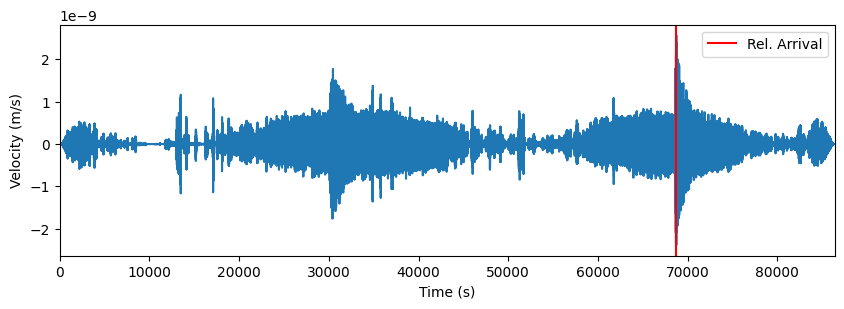

In [63]:
df = trainDfs[9]
csv_times = np.array(df['time_rel(sec)'].tolist())
csv_data = np.array(df['velocity(m/s)'].tolist())
#arrival = csv_times[findAnomaly(df, skip=1, time=30)]
arrival = csv_times[findAnomaly(df)]
print(arrival)

fig,ax = plt.subplots(1,1,figsize=(10,3))
ax.plot(csv_times,csv_data)

ax.set_xlim([min(csv_times),max(csv_times)])
ax.set_ylabel('Velocity (m/s)')
ax.set_xlabel('Time (s)')

arrival_line = ax.axvline(x=arrival, c='red', label='Rel. Arrival')
ax.legend(handles=[arrival_line])